In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [ ]:
df.drop_duplicates('App',keep ='last',inplace=True)
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook      1
Pokémon TV                                          1
Flipped Out! - Powerpuff Girls                      1
Adventure Time Game Wizard                          1
Best Park in the Universe                           1
                                                   ..
Mopar Drag N Brag                                   1
Read Unlimitedly! Kids'n Books                      1
Dark Infusion Substratum Theme for Android N & O    1
Fantastic Chefs: Match 'n Cook                      1
iHoroscope - 2018 Daily Horoscope & Astrology       1
Name: App, Length: 9660, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Rating
count,8197.000000
mean,4.175027
std,0.560685
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


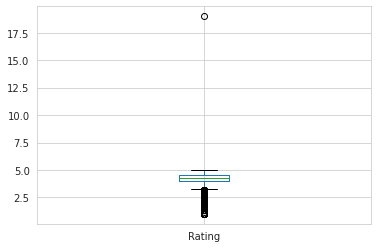

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b104e9490>]],
      dtype=object)

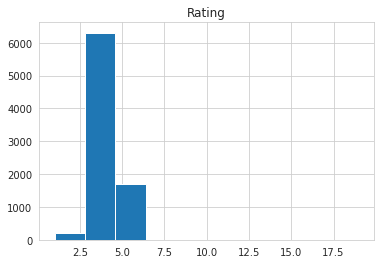

In [ ]:
df.hist()

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
df.Rating = df['Rating'].transform(impute_median)

In [ ]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']]

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df[df['Rating'] >5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


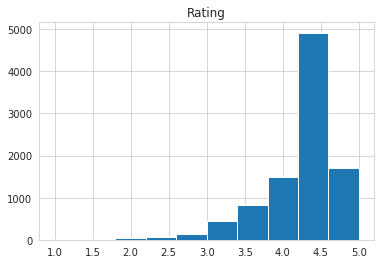

In [ ]:
df.hist();

In [ ]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x:float(x))

In [ ]:
price_list = df['Price'].tolist()

In [ ]:
print(price_list)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
df['Price']=df['Price'].apply(lambda x: str(x).replace('$','')if '$'in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x: float(x))
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
df['Installs'] = imp.fit_transform(df[['Installs']])

imp_mode = SimpleImputer(strategy='most_frequent')
df['Category'] = imp_mode.fit_transform(df[['Category']])
df['Rating'] = imp_mode.fit_transform(df[['Rating']])

In [ ]:
df.shape

(9659, 13)

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192422,2.166512e+05,7.794247e+06,1.097231
std,0.496071,1.830738e+06,5.376991e+07,16.851618
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.812821e+07,1.000000e+09,400.000000


In [ ]:
df.describe(include='object')

,App,Category,Size,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,9659,9659,9659,9659,9659,9659,9659
unique,9659,33,461,2,6,118,1377,2818,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Varies with device,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1906,1227,8905,7903,828,252,1062,2208


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [ ]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,9659.000000,9.659000e+03,9659,9.659000e+03,9659,9659.000000,9659,9659,9659,9659,9659
unique,9659,33,NaN,NaN,461,NaN,2,NaN,6,118,1377,2818,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1906,NaN,NaN,1227,NaN,8905,NaN,7903,828,252,1062,2208
mean,NaN,NaN,4.192422,2.166512e+05,NaN,7.794247e+06,NaN,1.097231,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.496071,1.830738e+06,NaN,5.376991e+07,NaN,16.851618,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,9.690000e+02,NaN,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,2.940100e+04,NaN,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
df['Type'] = pd.get_dummies(df['Type'], drop_first=True)

In [ ]:
type_list = df['Type'].tolist()
print(type_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,0,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [ ]:
df.describe(include='object')

,App,Category,Size,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,9659,9659,9659,9659,9659,9659
unique,9659,33,461,6,118,1377,2818,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Varies with device,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1906,1227,7903,828,252,1062,2208


In [ ]:
df[['Category']].value_counts()

Category           
FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
ENTERTAINMENT            79
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
dtype: int64

In [ ]:
df[['Type']].value_counts()

Type
0       8905
1        754
dtype: int64

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
df.describe(include='object').columns

Index(['App', 'Category', 'Size', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [ ]:
encoder = ce.OrdinalEncoder(cols=['App', 'Category', 'Size', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'])
df = encoder.fit_transform(df)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1,1,4.1,159,1,10000.0,0,0.0,1,1,1,1,1
2,2,1,4.7,87510,2,5000000.0,0,0.0,1,1,2,2,1
3,3,1,4.5,215644,3,50000000.0,0,0.0,2,1,3,3,2
4,4,1,4.3,967,4,100000.0,0,0.0,1,2,4,4,3
5,5,1,4.4,167,5,50000.0,0,0.0,1,1,5,5,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
df.Category.value_counts()

19    1906
18     926
26     829
5      419
20     396
27     376
28     374
17     369
12     345
24     327
7      316
14     287
23     281
32     254
21     239
4      222
25     219
22     202
8      170
31     163
33     131
13     112
9      102
2       85
16      84
10      79
30      79
15      73
11      64
1       61
29      60
6       56
3       53
Name: Category, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('Type', axis=1)
y = df['Type']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state=21, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6679
           1       1.00      1.00      1.00       565

    accuracy                           1.00      7244
   macro avg       1.00      1.00      1.00      7244
weighted avg       1.00      1.00      1.00      7244



In [ ]:
from sklearn.metrics import plot_confusion_matrix

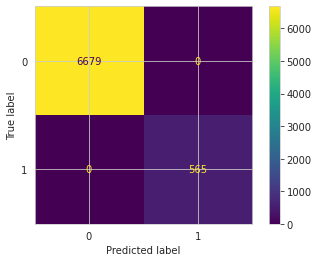

In [ ]:
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

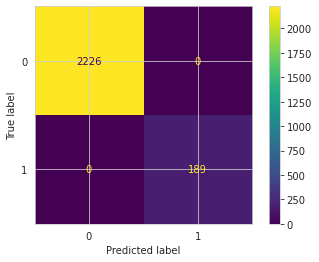

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[6] <= 0.495\ngini = 0.144\nsamples = 7244\nvalue = [6679, 565]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6679\nvalue = [6679, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 565\nvalue = [0, 565]')]

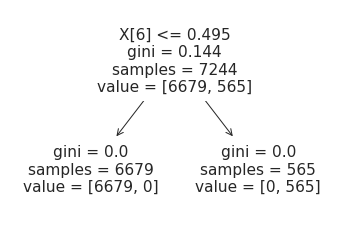

In [ ]:
plot_tree(clf.fit(X_train, y_train))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7244, 12), (2415, 12), (7244,), (2415,))

In [ ]:
df.shape

(9659, 13)

In [ ]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf2.fit(X_train,y_train)
print(classification_report(clf2.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6679
           1       1.00      1.00      1.00       565

    accuracy                           1.00      7244
   macro avg       1.00      1.00      1.00      7244
weighted avg       1.00      1.00      1.00      7244



In [ ]:
df.sort_values(by=['Installs','Rating'], ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,2716,18,4.5,27711703,144,1.000000e+09,0,0.00,3,32,20,1284,6
3909,2729,21,4.5,66509917,28,1.000000e+09,0,0.00,2,85,11,3,9
5395,4215,23,4.5,10847682,28,1.000000e+09,0,0.00,1,87,2,3,9
3904,2724,7,4.4,69109672,28,1.000000e+09,0,0.00,1,9,14,3,9
4150,2970,26,4.4,8021623,28,1.000000e+09,0,0.00,1,90,14,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,8157,25,4.3,0,37,0.000000e+00,1,3.99,1,88,479,271,6
9719,8539,20,4.3,0,72,0.000000e+00,1,200.00,1,84,851,5,5
9905,8725,12,4.3,0,66,0.000000e+00,1,30.99,1,21,287,5,7
9917,8737,12,4.3,0,152,0.000000e+00,1,394.99,1,21,30,5,1
